## Sección 1

Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la
forma del sépalo

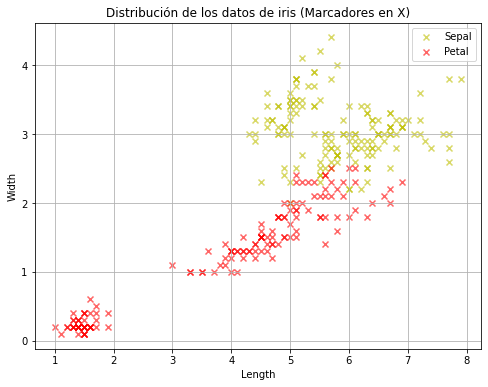

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("iris.csv")

plt.figure(figsize=(8, 6))
plt.scatter(df["sepal_length"], df["sepal_width"], alpha=0.6, label="Sepal", color='y', marker='x')
plt.scatter(df["petal_length"], df["petal_width"], alpha=0.6, label="Petal", color='r', marker='x')

plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Distribución de los datos de iris (Marcadores en X)")
plt.legend()
plt.grid(True)
plt.show()



Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.